In [242]:
import scqubits as scq 

In [243]:
scq.GUI()


Output(layout=Layout(width='100%'))

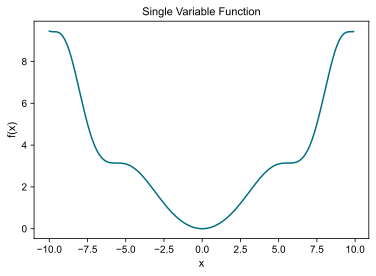

In [246]:
# Matrix computations
from numpy import *
# Plotting
from matplotlib.pyplot import *

# Change size of figures
#fig_size = [9,7]
#rcParams["figure.figsize"] = fig_size

# Define function f(x)
def f(x):
    return 0.1*x**2 + sin(0.1*x**2)

# Plot function on given range
# Second arguments allows for seperate points to be ploted on f(x)
def plotf(x, xdots, label):

    # Compute y-values
    y = f(x)

    # Plot (x, f(x))
    plot(x,y)
    xlabel("x")
    ylabel("f(x)")
    title(label)
    
    # Plot points on f(x)
    plot(xdots, f(xdots), 'bo')
    show()
    
# Plot f(x) from [-10,10]
x = arange(-10, 10, 0.1)
plotf(x, np.array([]), "Single Variable Function")

In [245]:
# Derivative of f(x) is f'(x) (denoted by df below)
# f'(x) = 0.2x + 0.2xcos(0.1x^2)
def df(x):
    return 0.2*x + 0.2*x*cos(0.1*(x**2))

In [247]:
# Gradient descent for single variable
# Depends on f(x), f'(x), x_1, and lambda
def grad_descent(df,x_prev,learn_rate, sequence):

    # Epsilon threshold 
    epsilon = 0.001
    
    # Itterations number
    grad_itter = 1

    # First itteration of gradient descent
    x_next = x_prev - learn_rate*df(x_prev)
    
    # Save first itteration
    sequence = np.append(sequence, x_next)

    # while abs(x_{t+1} - x_{t}) > threshold, keep itterating gradient descent
    while abs(x_next - x_prev) > epsilon:

        # Update x_{t}
        x_prev = x_next

        # Gradient descent step
        # Set new x_{t+1} = x_{t} - lambda*f'(x_{t})
        x_next = x_prev - learn_rate*df(x_prev)
        
        # Save itteration 
        sequence = np.append(sequence, x_next)
        
        # Increment itteration
        grad_itter += 1
        
    # Output converged x_{T}
    return (x_next, sequence, grad_itter)

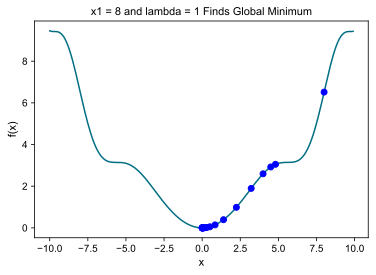

Minimum x-value from gradient descent: 0.0011070554765544726
Number of gradient descent itterations: 20


In [248]:
# Output vector (min x-value, (x_1,..,x_T)) from gradient descent
# Initial value x1 = 8 and learn rate lambda = 1
grad_output = grad_descent(df,8,1, np.array([8]))

# Plot including converging sequence on f(x)
plotf(x, grad_output[1], "x1 = 8 and lambda = 1 Finds Global Minimum")

# Print gradient descent solution
print('Minimum x-value from gradient descent: %s' %grad_output[0])
print('Number of gradient descent itterations: %s' %grad_output[2])

In [304]:
#let's try a similar gradient descent for fluxonium in 1D
#let's begin with finding the point of best T_phi in the E01 landscape, with only one dimension (flux)

#define the fluxonium
fluxonium = scq.Fluxonium(EJ=10,
                              EC=4,
                              EL = 0.3,
                              flux = 0.0,
                              cutoff=101)

# Define function f(x) that quantifies dE01/dlambda, and is the objective or cost function
#numerical differential function
def f(x):
    E01_temp = []
    delta_phi = 0.01 #tests the gradient with this flux increment, can change this
    
    fluxonium.flux = x+delta_phi #define flux at one point
    hold = fluxonium.eigenvals(evals_count = 2)
    E01_xplusdelta = hold[1]-hold[0] #calculate E01 at first flux point
    
    fluxonium.flux = x-delta_phi
    hold = fluxonium.eigenvals(evals_count = 2)
    E01_xminusdelta = hold[1]-hold[0] #calculate E01 at second flux point
    
    return np.abs(E01_xplusdelta-E01_xminusdelta) #difference between E01 at two adjacent points

In [105]:
f(1),f(0.2), f(0.3)

(1.4210854715202004e-13, -0.21753492828496235, -0.21211165691259115)

In [305]:
test_flux = np.linspace(0,1,100)
test = []

for i in range(len(test_flux)):
    #print(i)
    test.append(f(test_flux[i]))
    
#appears to work
    

In [306]:
#now need to define the gradient of this function - this is a numerical gradient
def df(x):
    delta_phi_grad = 0.1
    return (f(x+delta_phi_grad)-f(x-delta_phi_grad))

In [376]:
# Gradient descent for single variable
#this defines the gradient descent algorithm
# Depends on f(x), f'(x), x_1, and lambda
def grad_descent_fluxonium(df,x_prev,learn_rate, sequence):
    #sequences stores the points in the gradient descent
    sequence = []
    # Epsilon  - difference between two consecutive tried values
    epsilon = 0.001
    
    # Itterations number
    grad_itter = 1

    # First itteration of gradient descent
    x_next = x_prev - learn_rate*df(x_prev)
    
    # Save first iteration
    sequence = np.append(sequence, x_next)
    while abs(x_next - x_prev) > epsilon:
        x_prev = x_next
        x_next = x_prev - learn_rate*df(x_prev)
        sequence = np.append(sequence, x_next)
        grad_itter += 1
        
    # Output converged x_{T}
    return (x_next, sequence, grad_itter)

In [308]:
# Second arguments allows for seperate points to be ploted on f(x)
def plotflux(x, xdots, label):
    y = []
    # Compute y-values
    for i in range(len(x)):
        y.append(f(x[i]))

    # Plot (x, f(x))
    plot(x,y)
    xlabel("x")
    ylabel("f(x)")
    title(label)
    
    y_dots = []
    # Plot points on f(x)
    for k in range(len(xdots)):
        y_dots.append(f(xdots[k]))
        
    plot(xdots, y_dots, 'bo')
    show()

0.6699584933277405
0.6174041657216671
0.4616257729771821
0.5097500480125773
0.49892460616123635
0.5001085137700728


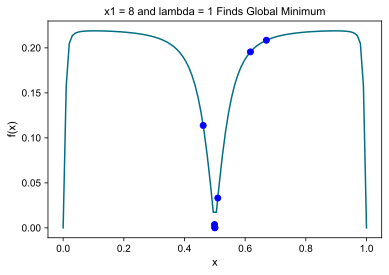

Minimum x-value from gradient descent: 0.4999890626840492
Number of gradient descent itterations: 7


In [313]:
# Output vector (min x-value, (x_1,..,x_T)) from gradient descent
# Initial value x1 = 8 and learn rate lambda = 1
grad_output = grad_descent_fluxonium(df,0.7,1, np.array([8]))

# Plot including converging sequence on f(x)
plotflux(test_flux, grad_output[1], "x1 = 8 and lambda = 1 Finds Global Minimum")

# Print gradient descent solution
print('Minimum x-value from gradient descent: %s' %grad_output[0])
print('Number of gradient descent itterations: %s' %grad_output[2])

In [301]:
#gradient descent from multiple starting points, randomly generated
import random
random.uniform(0, 1) #make sure random generator is uniform between 0 and 1

def start_point_generator():
    return(random.random())

start_point_generator()

0.12764635525265822

Minimum x-value from gradient descent: 0.4991879175242887
Number of gradient descent itterations: 10
Starting Point: 0.6473313501003629


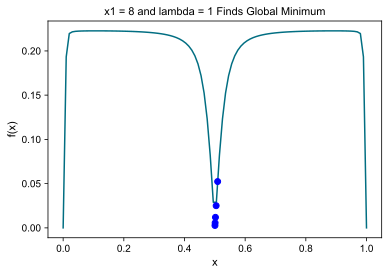

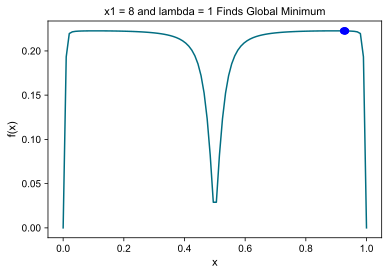

In [377]:
# Output vector (min x-value, (x_1,..,x_T)) from gradient descent
num_iterations = 50
starting_points = []
optimal_points = []
no_iterations = []
paths = []

for i in range(num_iterations):
    starting_points.append(start_point_generator())

for i in range(num_iterations):
    grad_output = grad_descent_fluxonium(df,starting_points[i],1, np.array([8]))
    optimal_points.append(grad_output[0])
    no_iterations.append(grad_output[2])
    paths.append(grad_output[1])
    
    
#plotflux(test_flux, grad_output[1], "x1 = 8 and lambda = 1 Finds Global Minimum")

# Plot including converging sequence on f(x)

# Print gradient descent solution
print('Minimum x-value from gradient descent: %s' %grad_output[0])
print('Number of gradient descent itterations: %s' %grad_output[2])
print('Starting Point: %s' %starting_points[0])



plotflux(test_flux, paths[1], "x1 = 8 and lambda = 1 Finds Global Minimum")
plotflux(test_flux, paths[2], "x1 = 8 and lambda = 1 Finds Global Minimum")

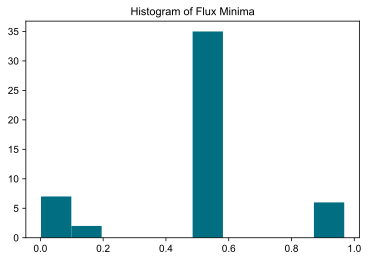

In [378]:
#histogram to find the two points of interest
from matplotlib import pyplot as plt 

plt.hist(optimal_points)
plt.title("Histogram of Flux Minima") 
plt.show()



In [367]:
#let's try a similar gradient descent for fluxonium in 1D
#let's begin with finding the point of best T_phi in the E01 landscape, with only one dimension (flux)

#define the fluxonium
fluxonium = scq.Fluxonium(EJ=10,
                              EC=4,
                              EL = 0.3,
                              flux = 0.0,
                              cutoff=101)

# Define function f(x) that numerically quantifies both the first and second derivatives
#numerical differential function
def f_bothderiv(x):
    delta_phi = 0.01 #tests the gradient with this much resolution
    #fluxonium.flux = x
    #E01_x = fluxonium.eigenvals(evals_count = 2)[1]-fluxonium.eigenvals(evals_count = 2)[0]
    
    fluxonium.flux = x
    hold = fluxonium.eigenvals(evals_count = 2)
    E01_xcentre = hold[1]-hold[0]
    
    fluxonium.flux = x+delta_phi
    hold = fluxonium.eigenvals(evals_count = 2)
    E01_xplusdelta = hold[1]-hold[0]
    
    fluxonium.flux = x-delta_phi
    hold = fluxonium.eigenvals(evals_count = 2)
    E01_xminusdelta = hold[1]-hold[0]
    
    first_derivative = E01_xplusdelta-E01_xminusdelta
    second_derivative = (E01_xplusdelta-E01_xcentre) - (E01_xcentre-E01_xminusdelta)
    return np.abs(first_derivative+0.5*second_derivative)

#now need to define the gradient of this function - this is a numerical gradient
def df_bothderiv(x):
    delta_phi_grad = 0.1
    return (f_bothderiv(x+delta_phi_grad)-f_bothderiv(x-delta_phi_grad))




0.20702235410317577
0.21477868985908827
0.22341890911377088
0.2331553971281471
0.24430182168524878
0.25734812904923304
0.27312128409520237
0.2931823165780291
0.3210332517364833
0.3672277347005904
0.48713320560440304
0.49864652756135547
0.49739570292379903


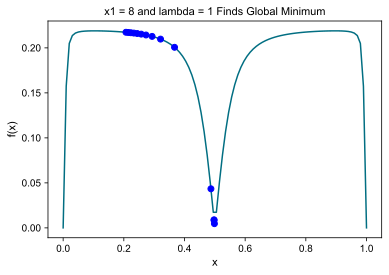

Minimum x-value from gradient descent: 0.4975196061875044
Number of gradient descent itterations: 14


In [347]:
# Output vector (min x-value, (x_1,..,x_T)) from gradient descent

grad_output = grad_descent_fluxonium(df_bothderiv,0.2,1, np.array([8]))
plotflux(test_flux, grad_output[1], "x1 = 8 and lambda = 1 Finds Global Minimum")

# Plot including converging sequence on f(x)

# Print gradient descent solution
print('Minimum x-value from gradient descent: %s' %grad_output[0])
print('Number of gradient descent itterations: %s' %grad_output[2])
#print('Starting Point: %s' %starting_points[0])

#plotflux(test_flux, grad_output[1], "x1 = 8 and lambda = 1 Finds Global Minimum")



Minimum x-value from gradient descent: 0.4975305055715016
Number of gradient descent itterations: 5
Starting Point: 0.7997404782074817


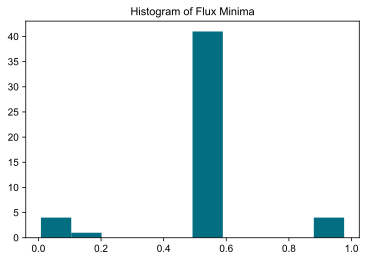

In [350]:
# Output vector (min x-value, (x_1,..,x_T)) from gradient descent
num_iterations = 50
starting_points = []
optimal_points = []
no_iterations = []
paths = []

for i in range(num_iterations):
    starting_points.append(start_point_generator())

for i in range(num_iterations):
    grad_output = grad_descent_fluxonium(df_bothderiv,starting_points[i],1, np.array([8]))
    optimal_points.append(grad_output[0])
    no_iterations.append(grad_output[2])
    paths.append(grad_output[1])
    
    
#plotflux(test_flux, grad_output[1], "x1 = 8 and lambda = 1 Finds Global Minimum")

# Plot including converging sequence on f(x)

# Print gradient descent solution
print('Minimum x-value from gradient descent: %s' %grad_output[0])
print('Number of gradient descent itterations: %s' %grad_output[2])
print('Starting Point: %s' %starting_points[0])


plt.hist(optimal_points)
plt.title("Histogram of Flux Minima") 
plt.show()


#plotflux(test_flux, paths[1], "x1 = 8 and lambda = 1 Finds Global Minimum")
#plotflux(test_flux, paths[2], "x1 = 8 and lambda = 1 Finds Global Minimum")

In [ ]:
test_flux = np.linspace(-1,0,25)
test = []
test_derivative = []

for i in range(len(test_flux)):
    #print(i)
    test.append(f(test_flux[i]))
    test_derivative.append(df(test_flux[i]))
#appears to work
    

In [ ]:
plt.plot(test_flux,test)
plt.plot(test_flux, test_derivative)

In [ ]:
#OKAY NOW LET'S TRY FOR 2D, and let's write this thing for two arbitrary parameters

#still need to start with an intial fluxionium 


In [382]:
#let's try gradient descent for fluxonium in 2D
#let's begin with finding the point of best T_phi in the E01 landscape, with only one dimension (flux)

#define the fluxonium
fluxonium = scq.Fluxonium(EJ=10,
                              EC=4,
                              EL = 0.3,
                              flux = 0.0,
                              cutoff=101)


#Define delta_x for different parameters
def delta_x(param):
    if param == "EC":
        grad = 0.1
    if param == "EL":
        grad = 0.02  
    if param == "EJ":
        grad = 0.1 
    if param == "flux":
        grad = 0.01
    
    return grad
        
# Define function f(x) - the function that I am trying to minimise is the derivative of the eigenenergies
def f_2D(x1,x2,param1,param2):
    # x1 is the starting value of param1
    # x2 is the starting value of param2
    # param1 is the first H parameter being optimised over
    # param2 is the second

    setattr(fluxonium,param2,x2)
    setattr(fluxonium,param1,x1)

    delta_param1 = delta_x(param1)
    delta_param2 = delta_x(param2)

    hold = fluxonium.eigenvals(evals_count = 2)
    E01_0 = hold[1]-hold[0]
    
    setattr(fluxonium,param1, x1+delta_param1)
    hold1 = fluxonium.eigenvals(evals_count = 2)
    E01_param1 = hold1[1]-hold1[0]
    setattr(fluxonium,param1,x1)


    setattr(fluxonium,param2,x2+delta_param2)
    hold2 = fluxonium.eigenvals(evals_count = 2)
    E01_param2 = hold2[1]-hold2[0]
    
    return (np.abs(E01_param1-E01_0), np.abs(E01_param2-E01_0))


#now need to define the gradient of this function - this is a numerical gradient
#x should be a vector
def df_2D(x1,x2,param1,param2):
    delta_phi_grad = 0.1
    point1 = f_2D(x1,x2,param1,param2)
    point2 = f_2D(x1+delta_phi_grad,x2+delta_phi_grad,param1,param2)    
    return (point1[1]-point1[0],point2[1]-point2[0])

test = df_2D(0.5,1,"flux","EJ")
print(test)
test[0]

(0.03611205829817754, 0.014913126679688027)


0.03611205829817754

In [383]:
# Gradient descent for single variable
#this defines the gradient descent algorithm
# Depends on f(x), f'(x), x_1, and lambda

#THIS IS WHERE YOU ARE UP TO 
def grad_descent_fluxonium2D(df,x_prev1,x_prev2, param1, param2,learn_rate, sequence):
    #df will be df_2D
    #sequences stores the points in the gradient descent
    sequence = []
    # Epsilon  - difference between two consecutive tried values
    epsilon = 0.001
    
    # Itterations number
    grad_itter = 1

    # First itteration of gradient descent
    x_div = df_2D(x_prev1,x_prev2,param1,param2)
    
    x_next1 = x_prev1 - learn_rate*x_div[0]
    x_next2 = x_prev2 - learn_rate*x_div[1]

    
    # Save first iteration
    sequence = np.append(sequence, x_next1)

    # while abs(x_{t+1} - x_{t}) > threshold, keep itterating gradient descent
    while abs(x_next - x_prev) > epsilon:

        # Update x_{t}
        x_prev = x_next

        #print(x_prev) #this can be good to make sure it's running
        # Gradient descent step
        # Set new x_{t+1} = x_{t} - lambda*f'(x_{t})
        x_next = x_prev - learn_rate*df(x_prev)
        
        # Save itteration 
        sequence = np.append(sequence, x_next)
   
        # Increment itteration
        grad_itter += 1
        
    # Output converged x_{T}
    return (x_next, sequence, grad_itter)

In [235]:
print(f_2D(0.2,1,"flux", "EC"))

print(fluxonium.flux)
print(fluxonium)

0.2
1
(0.1139239485243051, 0.002280050997114369)
0.2
Fluxonium-----------| [Fluxonium_40]
                    | EJ: 10
                    | EC: 1
                    | EL: 0.3
                    | flux: 0.2
                    | cutoff: 101
                    | truncated_dim: 6
                    |
                    | dim: 101



NameError: name 'E01_param2' is not defined

Output(layout=Layout(width='100%'))

2.724513553714388


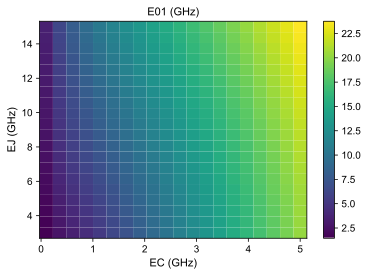

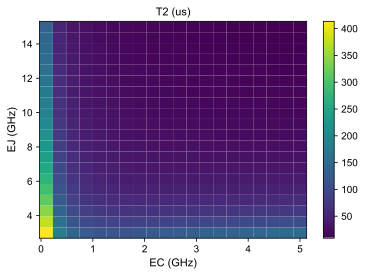

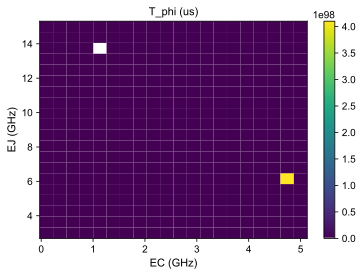

array([-2.06652155])

In [26]:
fluxonium.supported_noise_channels()

['tphi_1_over_f_cc',
 'tphi_1_over_f_flux',
 't1_capacitive',
 't1_charge_impedance',
 't1_flux_bias_line',
 't1_inductive',
 't1_quasiparticle_tunneling']

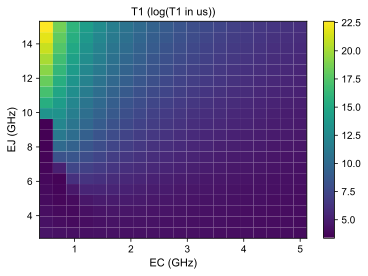

In [21]:
#plotting T1
plt.figure
#plt.pcolormesh(EC, EJ, np.log(T1_2D_fluxonium))
plt.pcolormesh(EC, EJ, np.log(T1_2D_fluxonium))


plt.xlabel("EC (GHz)")
plt.ylabel("EJ (GHz)")
plt.title("T1 (log(T1 in us))")
plt.colorbar(orientation='vertical')

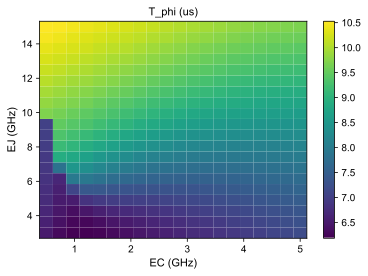

In [11]:
#plotting T1
plt.figure
plt.pcolormesh(EC, EJ, np.log(Tphi_2D_fluxonium))
plt.xlabel("EC (GHz)")
plt.ylabel("EJ (GHz)")
plt.title("T_phi (us)")
plt.colorbar(orientation='vertical')

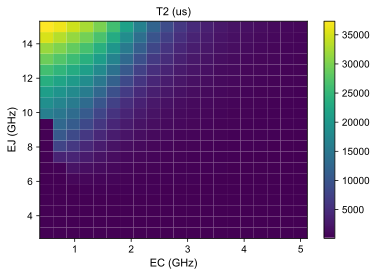

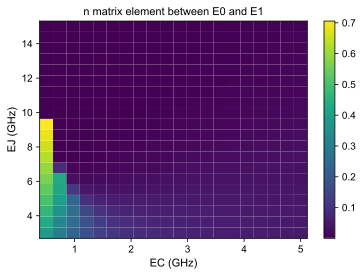

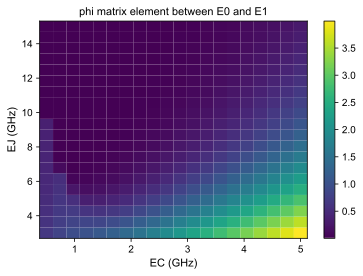

In [4]:
#custom circuit work

zp_yaml = """# zero-pi
branches:
- ["JJ", 1,2, EJ = 10, 20]
- ["JJ", 3,4, EJ, 20]
- ["L", 2,3, 0.008]
- ["L", 4,1, 0.008]
- ["C", 1,3, 0.02]
- ["C", 2,4, 0.02]
"""

zero_pi = scq.Circuit(zp_yaml, from_file=False)
zero_pi.eigenvals()
#zero_pi.plot_evals_vs_paramvals("Φ1", np.linspace(0,1,21));

array([-3.66713832, -3.65542458, -3.64979332, -3.63807958, -3.54945453,
       -3.54891778])

In [ ]:
eigensys = zero_pi.eigensys()
zero_pi.plot_wavefunction(which=1, var_indices=(1,3), esys=eigensys);

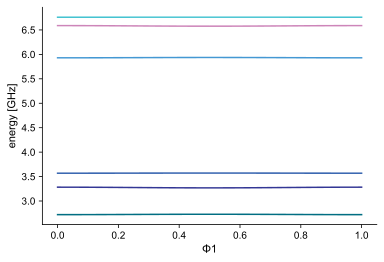

In [46]:
#custom circuit work
import numpy as np
import matplotlib.pyplot as plt
zp_coupling_cap = """# zero-pi
branches:
- ["JJ", 1,2, EJ = 10, 20]
- ["JJ", 3,4, EJ, 20]
- ["L", 1,3, 0.3]
- ["L", 2,4, 0.3]
- ["C", 1,5, 0.04]
- ["C", 5,4, 0.04]
- ["C", 2,6, 0.04]
- ["C", 6,3, 0.04]
"""

zero_pi_mod = scq.Circuit(zp_coupling_cap, from_file=False)
zero_pi_mod.eigenvals()
zero_pi_mod.plot_evals_vs_paramvals("Φ1", np.linspace(0,1,21));

In [32]:
print(zero_pi_mod.var_categories)
print(zero_pi.var_categories)

print(zero_pi_mod.sym_hamiltonian())
print(zero_pi.sym_hamiltonian())

print(zero_pi_mod.sym_external_fluxes())
print(zero_pi.sym_external_fluxes())

{'periodic': [1], 'extended': [2, 3], 'free': [4, 5], 'frozen': []}
{'periodic': [1], 'extended': [2, 3], 'free': [], 'frozen': []}


<IPython.core.display.Latex object>

None


<IPython.core.display.Latex object>

None
{Φ1: (Branch(JJ, 3, 4, id_str: 1), [Branch(L, 1, 3, id_str: 2), Branch(JJ, 1, 2, id_str: 0), Branch(L, 2, 4, id_str: 3), Branch(JJ, 3, 4, id_str: 1)])}
{Φ1: (Branch(JJ, 3, 4, id_str: 1), [Branch(JJ, 1, 2, id_str: 0), Branch(L, 2, 3, id_str: 2), Branch(L, 4, 1, id_str: 3), Branch(JJ, 3, 4, id_str: 1)])}


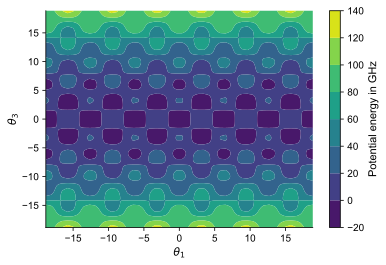

In [44]:
zero_pi.plot_potential(θ1=np.linspace(-6*np.pi, 6*np.pi),
                       θ3=np.linspace(-6*np.pi, 6*np.pi, 200),
                       θ2 = 0.);

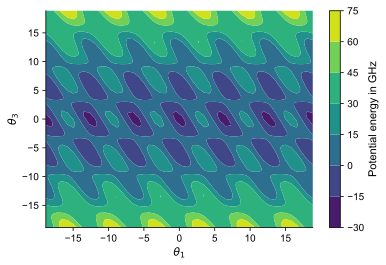

In [47]:
zero_pi_mod.plot_potential(θ1=np.linspace(-6*np.pi, 6*np.pi),
                       θ3=np.linspace(-6*np.pi, 6*np.pi, 200),
                       θ2 = 0.);

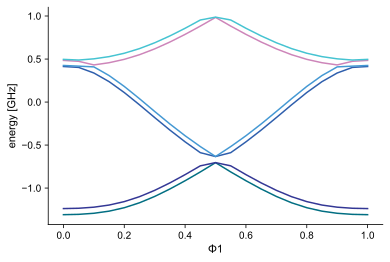

In [42]:
#custom circuit work

zp_yaml = """# zero-pi
branches:
- ["JJ", 1,2, EJ = 10, 20]
- ["JJ", 3,4, EJ, 20]
- ["L", 2,3, 0.3]
- ["L", 4,1, 0.3]
- ["C", 1,3, 0.08]
- ["C", 2,4, 0.08]
"""

zero_pi = scq.Circuit(zp_yaml, from_file=False)
zero_pi.eigenvals()
zero_pi.plot_evals_vs_paramvals("Φ1", np.linspace(0,1,21));

In [17]:
#figuring out what the equivalent capacitance would be for an arbitrary circuit
h = 6.63e-34
e = 1.602e-19
C_GHz = 0.08

C_farads = e**2/(2*h*C_GHz*1e9)
print(C_farads)

#what is two of these in series
C_tot = C_farads/2

E_C = e**2/(2*C_tot)/h/1e9
print(E_C)


2.419309954751131e-13
0.16000000000000003


Text(0, 0.5, 'T1 (us)')

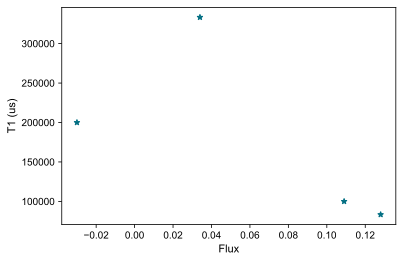

In [62]:
T1 = [1/12e-6,1/10e-6,1/3e-6,1/5e-6]
flux = [0.128,0.109,0.034,-0.03]

plt.plot(flux,T1, "*")
plt.xlabel("Flux")
plt.ylabel("T1 (us)")

<IPython.core.display.Latex object>

[0.6967794  2.72816501 3.09819303 4.29085601 5.43380435 5.51910258]


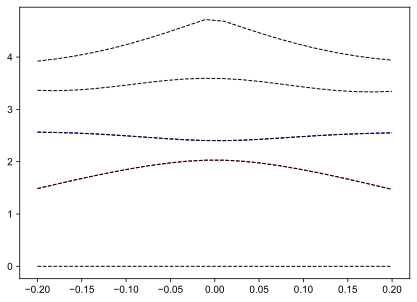

In [114]:
#custom circuit work

zp_yaml = """# zero-pi
branches:
- ["JJ", 2,3, EJ = 10, 0.3]
- ["JJ", 1,4, 10, 0.3]
- ["L", 1,2, 0.36]
- ["L", 3,4, 0.36]
- ["L", 3,1, 0.36]
"""

#protomon = scq.Circuit(zp_yaml, from_file=False)
#protomon.eigenvals()
#protomon.plot_evals_vs_paramvals("Φ1", np.linspace(0,1,21));


kite = scq.Circuit(zp_yaml,from_file=False, ext_basis = "harmonic")
kite.sym_hamiltonian()
print(kite.eigenvals())
#goal: generate a spectrum as a function of the different fluxes
kite.sym_external_fluxes()

numpoints = 20
number_of_eigenenergies = 5
offset = 0.01

flux = np.linspace(-0.2,0.2,numpoints)
EE_data = np.zeros(shape = (numpoints,number_of_eigenenergies))

for iii in range(len(flux)):
    kite.Φ1 = flux[iii] 
    kite.Φ2 = flux[iii]+offset
    data = kite.eigenvals(evals_count = number_of_eigenenergies)
    #print(data)
    for m in range(number_of_eigenenergies):
        EE_data[iii,m] = data[m]-data[0]

        
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)

plt.plot(flux,EE_data[:,1], "--", linewidth = 1, color = 'red')
plt.plot(flux,EE_data[:,2], "--", linewidth = 1, color = 'blue')


for i in range(number_of_eigenenergies):
    plt.plot(flux,EE_data[:,i], "--", linewidth = 1, color = 'black')
    #plt.plot(flux,EE_data[:,i]-4, "--", linewidth = 1, color = 'red')
    

<IPython.core.display.Latex object>

[0.31973663 2.41195948 2.69677826 4.1401081  4.82796246 4.94923171]


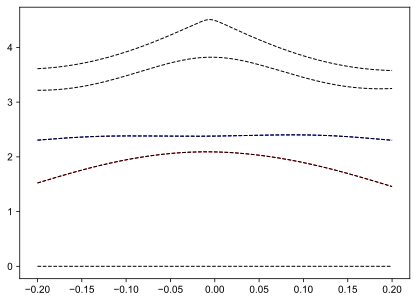

In [113]:
#custom circuit work

zp_yaml = """# zero-pi
branches:
- ["JJ", 2,3, EJ = 4, 5]
- ["JJ", 1,4, 8, 5]
- ["L", 1,2, 0.36]
- ["L", 3,4, 0.36]
- ["L", 3,1, 0.15]
"""

#protomon = scq.Circuit(zp_yaml, from_file=False)
#protomon.eigenvals()
#protomon.plot_evals_vs_paramvals("Φ1", np.linspace(0,1,21));


kite = scq.Circuit(zp_yaml,from_file=False, ext_basis = "harmonic")
kite.sym_hamiltonian()
print(kite.eigenvals())
#goal: generate a spectrum as a function of the different fluxes
kite.sym_external_fluxes()

numpoints = 200
number_of_eigenenergies = 5
offset = 0.01

flux = np.linspace(-0.2,0.2,numpoints)
EE_data = np.zeros(shape = (numpoints,number_of_eigenenergies))

for iii in range(len(flux)):
    kite.Φ1 = flux[iii] 
    kite.Φ2 = flux[iii]+offset
    data = kite.eigenvals(evals_count = number_of_eigenenergies)
    #print(data)
    for m in range(number_of_eigenenergies):
        EE_data[iii,m] = data[m]-data[0]

        
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)

plt.plot(flux,EE_data[:,1], "--", linewidth = 1, color = 'red')
plt.plot(flux,EE_data[:,2], "--", linewidth = 1, color = 'blue')


for i in range(number_of_eigenenergies):
    plt.plot(flux,EE_data[:,i], "--", linewidth = 1, color = 'black')
    #plt.plot(flux,EE_data[:,i]-4, "--", linewidth = 1, color = 'red')
    

<IPython.core.display.Latex object>

[0.17994806 2.44686823 2.88595815 3.74106153 4.60599847 5.33426059]


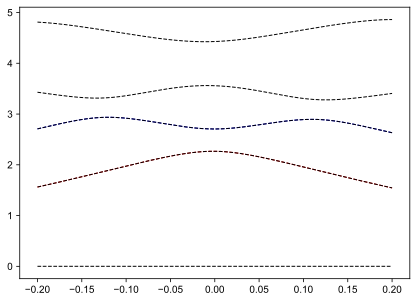

In [111]:
#custom circuit work

zp_yaml = """# zero-pi
branches:
- ["JJ", 2,3, EJ = 8, 5]
- ["JJ", 1,4, 4, 5]
- ["L", 1,2, 0.15]
- ["L", 3,4, 0.36]
- ["L", 3,1, 0.36]
"""

#protomon = scq.Circuit(zp_yaml, from_file=False)
#protomon.eigenvals()
#protomon.plot_evals_vs_paramvals("Φ1", np.linspace(0,1,21));


kite = scq.Circuit(zp_yaml,from_file=False, ext_basis = "harmonic")
kite.sym_hamiltonian()
print(kite.eigenvals())
#goal: generate a spectrum as a function of the different fluxes
kite.sym_external_fluxes()

numpoints = 200
number_of_eigenenergies = 5
offset = 0.01

flux = np.linspace(-0.2,0.2,numpoints)
EE_data = np.zeros(shape = (numpoints,number_of_eigenenergies))

for iii in range(len(flux)):
    kite.Φ1 = flux[iii] 
    kite.Φ2 = flux[iii]+offset
    data = kite.eigenvals(evals_count = number_of_eigenenergies)
    #print(data)
    for m in range(number_of_eigenenergies):
        EE_data[iii,m] = data[m]-data[0]

        
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)

plt.plot(flux,EE_data[:,1], "--", linewidth = 1, color = 'red')
plt.plot(flux,EE_data[:,2], "--", linewidth = 1, color = 'blue')


for i in range(number_of_eigenenergies):
    plt.plot(flux,EE_data[:,i], "--", linewidth = 1, color = 'black')
    #plt.plot(flux,EE_data[:,i]-4, "--", linewidth = 1, color = 'red')
    

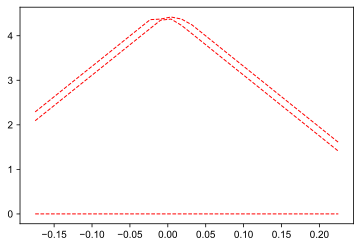

In [93]:
plt.plot(flux+0.05/2,EE_data[:,0], "--", linewidth = 1, color = 'red')
plt.plot(flux+0.05/2,EE_data[:,1], "--", linewidth = 1, color = 'red')
plt.plot(flux+0.05/2,EE_data[:,2], "--", linewidth = 1, color = 'red')


<IPython.core.display.Latex object>

[-22.09613626 -20.10212454 -18.50792329 -18.14746502 -18.01602734
 -17.58799926]


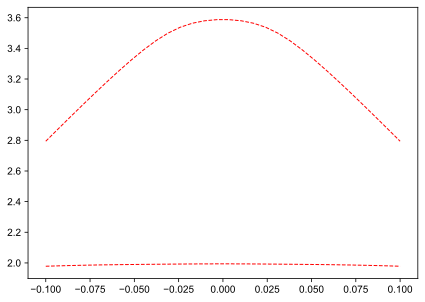

In [88]:
#custom circuit work

zp_yaml = """# zero-pi
branches:
- ["JJ", 2,3, EJ = 25, 0.3]
- ["JJ", 1,4, 2, 0.3]
- ["L", 1,2, 0.36]
- ["L", 3,4, 0.36]
- ["L", 3,1, 0.36]
"""

#protomon = scq.Circuit(zp_yaml, from_file=False)
#protomon.eigenvals()
#protomon.plot_evals_vs_paramvals("Φ1", np.linspace(0,1,21));


kite = scq.Circuit(zp_yaml,from_file=False, ext_basis = "harmonic")
kite.sym_hamiltonian()
print(kite.eigenvals())
#goal: generate a spectrum as a function of the different fluxes
kite.sym_external_fluxes()

numpoints = 30
number_of_eigenenergies = 5

flux = np.linspace(-0.1,0.1,numpoints)
EE_data = np.zeros(shape = (numpoints,number_of_eigenenergies))

for iii in range(len(flux)):
    kite.Φ1 = flux[iii] 
    kite.Φ2 = flux[iii]
    data = kite.eigenvals(evals_count = number_of_eigenenergies)
    #print(data)
    for m in range(number_of_eigenenergies):
        EE_data[iii,m] = data[m]-data[0]

        
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)

plt.plot(flux,EE_data[:,1], "--", linewidth = 1, color = 'red')
plt.plot(flux,EE_data[:,2], "--", linewidth = 1, color = 'red')


#for i in range(number_of_eigenenergies):
   # plt.plot(flux,EE_data[:,i], "--", linewidth = 1, color = 'red')
    #plt.plot(flux,EE_data[:,i]-4, "--", linewidth = 1, color = 'red')
    

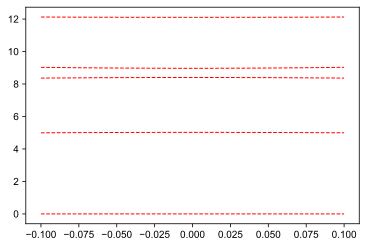

In [71]:

for i in range(number_of_eigenenergies):
    plt.plot(flux,EE_data[:,i], "--", linewidth = 1, color = 'red')
    #plt.plot(flux,EE_data[:,i]-4, "--", linewidth = 1, color = 'red')
    

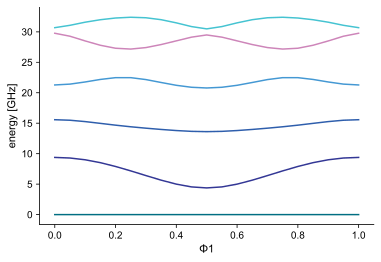

In [24]:
#custom circuit work
#custom circuit work
import numpy as np
import matplotlib.pyplot as plt
zp_yaml = """# zero-pi
branches:
- ["JJ", 1,2, EJ = 27.2, 7.7]
- ["JJ", 2,3, EJ, 7.7]
- ["L", 1,3, 0.94]
- ["C", 1,3, 10]
"""

zp_yaml = """# zero-pi
branches:
- ["JJ", 1,2, EJ = 27.2, 7.7]
- ["JJ", 2,3, EJ, 7.7]
- ["L", 1,3, 0.94]
"""

bifluxon = scq.Circuit(zp_yaml, from_file=False)
bifluxon.eigenvals()
bifluxon.ng1 = 0.5
bifluxon.plot_evals_vs_paramvals("Φ1", np.linspace(0,1,21), subtract_ground=True);


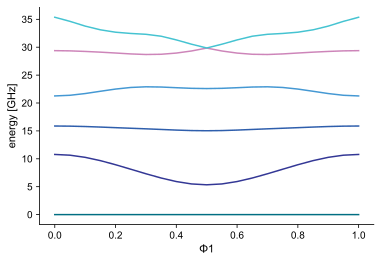

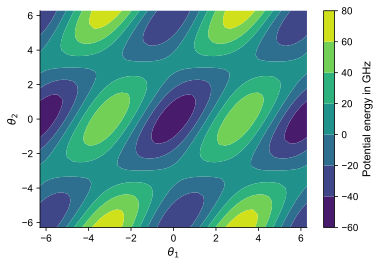

In [28]:
bifluxon.ng1 = 0
bifluxon.plot_evals_vs_paramvals("Φ1", np.linspace(0,1,21), subtract_ground=True);
bifluxon.plot_potential(θ1=np.linspace(-2*np.pi, 2*np.pi),
                       θ2 = np.linspace(-2*np.pi, 2*np.pi));

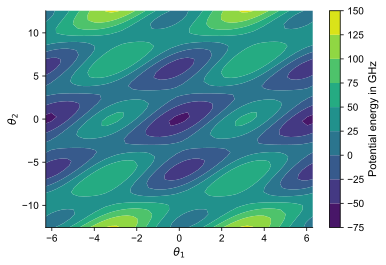

In [31]:
bifluxon.plot_potential(θ1=np.linspace(-2*np.pi, 2*np.pi),
                       θ2 = np.linspace(-4*np.pi, 4*np.pi));

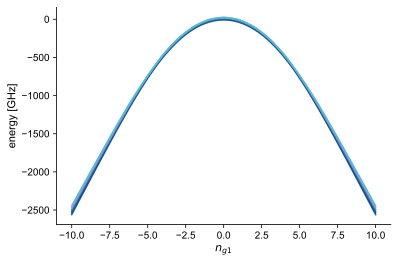

In [29]:
bifluxon.plot_evals_vs_paramvals("ng1", np.linspace(-10,10,101));


In [13]:
bifluxon.offset_charge_transformation()


<IPython.core.display.Latex object>

In [ ]:
#custom circuit work

zp_yaml = """# zero-pi
branches:
- ["JJ", 2,3, EJ = 25, 0.3]
- ["JJ", 1,4, 2, 0.3]
- ["L", 1,2, 0.36]
- ["L", 3,4, 0.36]
- ["L", 3,1, 0.36]
"""

#protomon = scq.Circuit(zp_yaml, from_file=False)
#protomon.eigenvals()
#protomon.plot_evals_vs_paramvals("Φ1", np.linspace(0,1,21));


kite = scq.Circuit(zp_yaml,from_file=False, ext_basis = "harmonic")
kite.sym_hamiltonian()
print(kite.eigenvals())
#goal: generate a spectrum as a function of the different fluxes
kite.sym_external_fluxes()

numpoints = 30
number_of_eigenenergies = 5

flux = np.linspace(-0.1,0.1,numpoints)
EE_data = np.zeros(shape = (numpoints,number_of_eigenenergies))

for iii in range(len(flux)):
    kite.Φ1 = flux[iii] 
    kite.Φ2 = flux[iii]
    data = kite.eigenvals(evals_count = number_of_eigenenergies)
    #print(data)
    for m in range(number_of_eigenenergies):
        EE_data[iii,m] = data[m]-data[0]

        
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)

plt.plot(flux,EE_data[:,1], "--", linewidth = 1, color = 'red')
plt.plot(flux,EE_data[:,2], "--", linewidth = 1, color = 'red')


#for i in range(number_of_eigenenergies):
   # plt.plot(flux,EE_data[:,i], "--", linewidth = 1, color = 'red')
    #plt.plot(flux,EE_data[:,i]-4, "--", linewidth = 1, color = 'red')
    